# Business Case: Business Case: Yulu - Hypothesis Testing

### Introduction
### 1. Defining Problem Statement and Analysing basic metrics

1.1 Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

The company wants to know:

* Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
* How well those variables describe the electric cycle demands

In [91]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [143]:
# import requried libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, t
from scipy.stats import ttest_1samp, ttest_ind,f,f_oneway
from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm
from scipy.stats import kruskal,shapiro,levene
from scipy.stats import chi2 # Distribution (cdf etc.)
from scipy.stats import chisquare # Statistical test (chistat, pvalue)
from scipy.stats import chi2_contingency # Categorical Vs Categorical



warnings.filterwarnings('ignore')

In [157]:
# Import the dataset
df=pd.read_csv('C:/Users/Sct/Downloads/yulu.csv')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


#### 1.2 Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required),  missing value detection, statistical summary.

In [3]:
# Checking shape of the data
df.shape

(10886, 12)

Insights - 

* Now we know that there are 10886 booking details and and 12 attributes for each booking.

In [4]:
# 5 point statistical summary
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [5]:
# coulumn details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


##### Datatype of following attributes needs to changed to proper data type
* datetime - to datetime
* season - to categorical
* holiday - to categorical
* workingday - to categorical
* weather - to categorical

In [6]:
df['datetime']=pd.to_datetime(df['datetime'])

In [7]:
cat_cols=['season','holiday','workingday','weather']
for col in cat_cols:
    df[col]=df[col].astype('category')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.7 KB


In [9]:
### Inspecting duplicate and null values
df[df.duplicated()]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


In [10]:
# check if any null value
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [11]:
# No. of unique values for each feature
df.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

Insights - 
* We can see that there is no duplicates rows in the dataset
* We can see that there is no null values in the dataset

#### 1.3 Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)

<AxesSubplot: ylabel='count'>

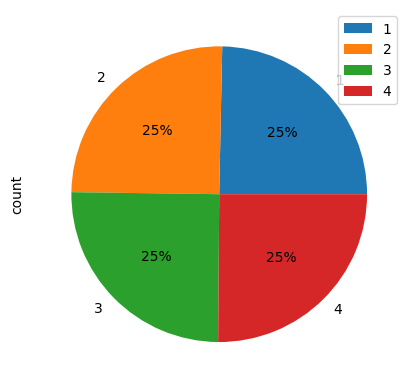

In [12]:
df.groupby(['season']).count().plot(kind='pie',y='count',autopct='%1.0f%%')

<AxesSubplot: ylabel='count'>

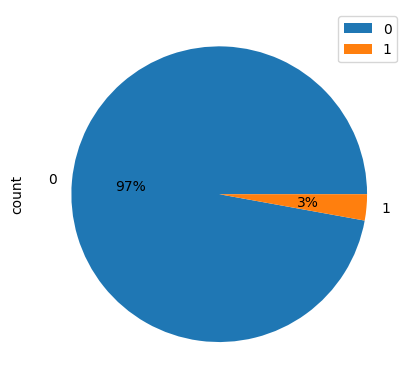

In [13]:
df.groupby(['holiday']).count().plot(kind='pie',y='count',autopct='%1.0f%%')

<AxesSubplot: ylabel='count'>

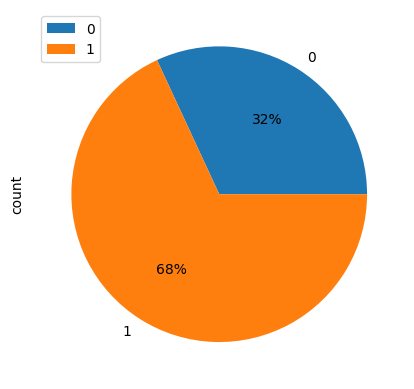

In [14]:
df.groupby(['workingday']).count().plot(kind='pie',y='count',autopct='%1.0f%%')

<AxesSubplot: ylabel='count'>

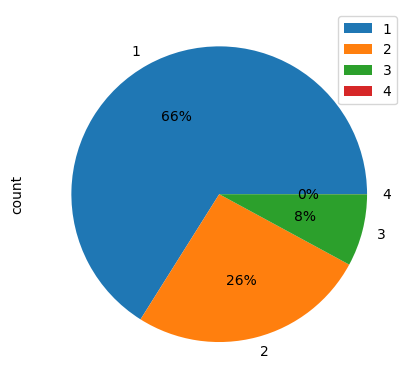

In [15]:
df.groupby(['weather']).count().plot(kind='pie',y='count',autopct='%1.0f%%')

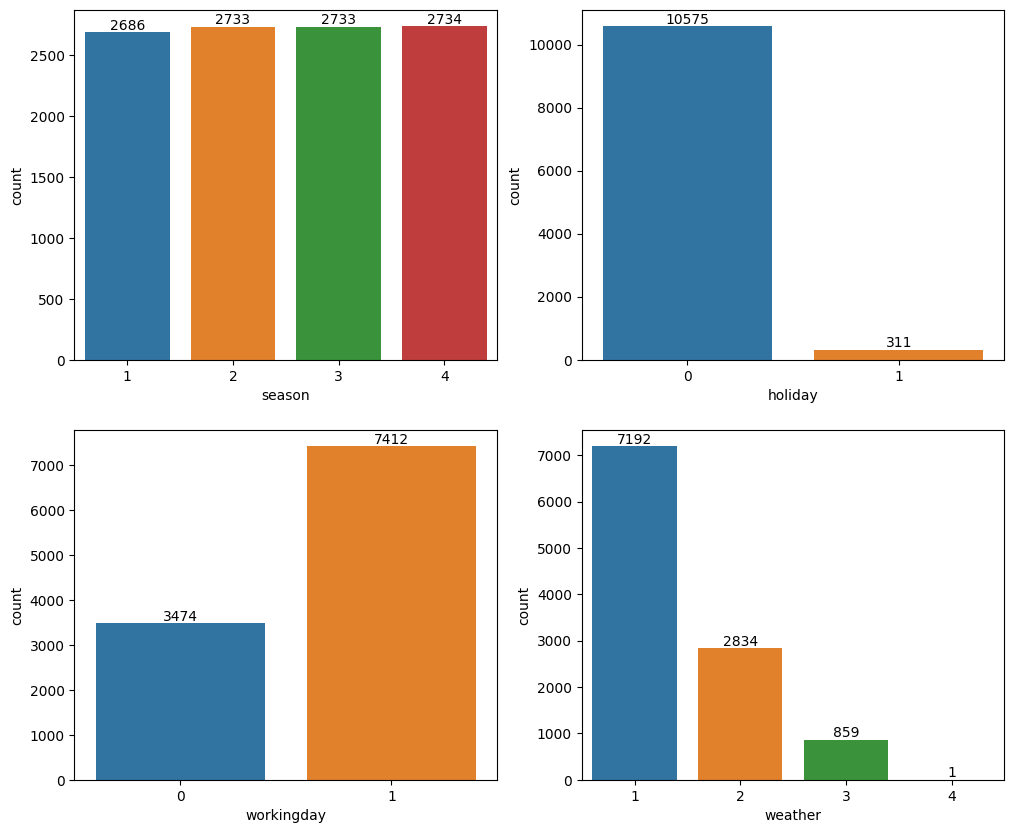

In [16]:
fig=plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
ax=sns.countplot(data=df,x='season')
ax.bar_label(ax.containers[0])

plt.subplot(2,2,2)
ax=sns.countplot(data=df,x='holiday')
ax.bar_label(ax.containers[0])

plt.subplot(2,2,3)
ax=sns.countplot(data=df,x='workingday')
ax.bar_label(ax.containers[0])

plt.subplot(2,2,4)
ax=sns.countplot(data=df,x='weather')
ax.bar_label(ax.containers[0])

plt.show()

Insights

* Seasons column is uniformly distributed. Equal number of days in all the four seasons.
* Data has almost twice the workingday than holiday/weekend. 
* Weather is mostly clear, sometimes we get mist or snowfall. But rarely a bad weather. Which is expected as people don't get out on bike on bad weather.

In [17]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.7 KB


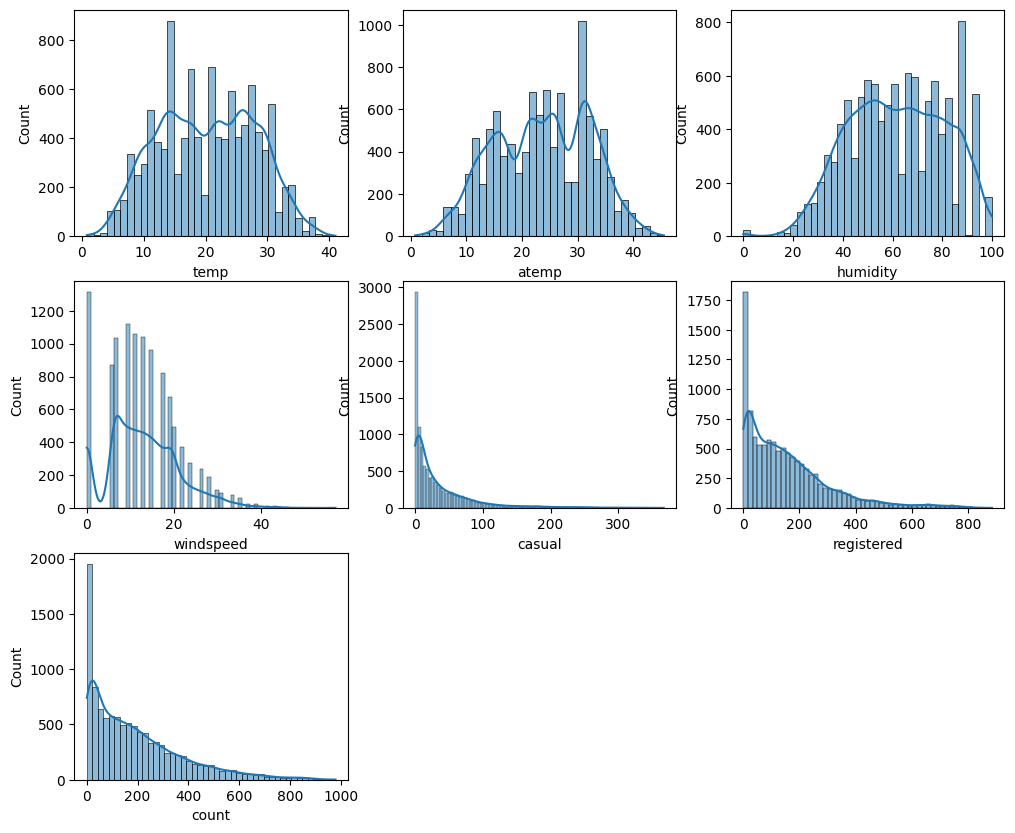

In [19]:
# Lets work on quantitative features and understand the distributions
fig=plt.figure(figsize=(12,10))

plt.subplot(3,3,1)
sns.histplot(data=df,x='temp',kde=True)

plt.subplot(3,3,2)
sns.histplot(data=df, x='atemp',kde=True)

plt.subplot(3,3,3)
sns.histplot(data=df, x='humidity',kde=True)

plt.subplot(3,3,4)
sns.histplot(data=df, x='windspeed',kde=True)

plt.subplot(3,3,5)
sns.histplot(data=df, x='casual',kde=True)

plt.subplot(3,3,6)
sns.histplot(data=df, x='registered',kde=True)

plt.subplot(3,3,7)
sns.histplot(data=df, x='count',kde=True)

plt.show()

Insights

* temp, atemp and humidity looks like they follows the Normal Distribution
* casual, registered and count looks like Log Normal Distrinution
* windspeed looks like follows the binomial distribution

#### 1.4 Bivariate Analysis (Relationships between important variables such as workday and count, season and count, weather and count.

In [20]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

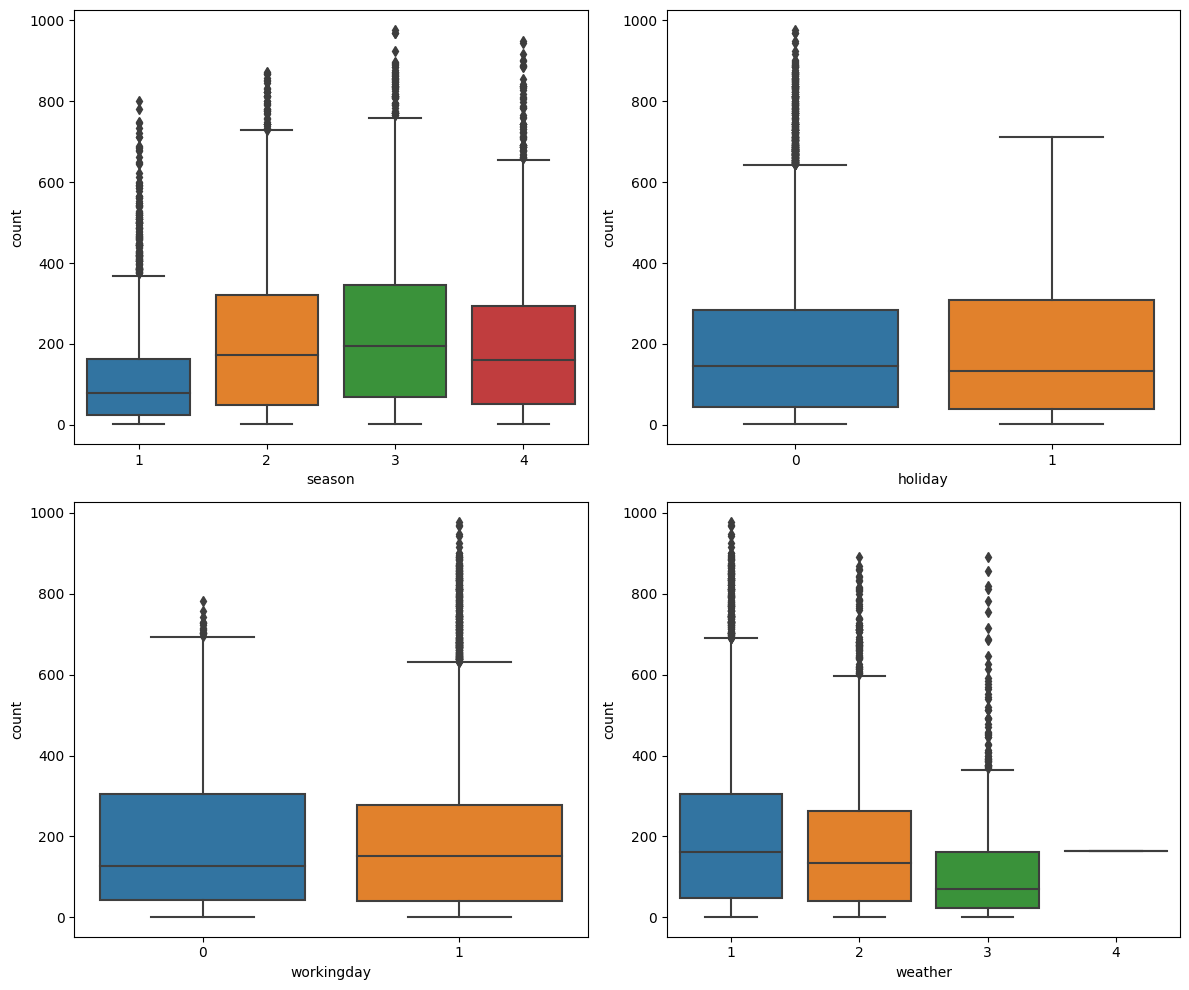

In [21]:
fig=plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(data=df,x='season',y='count')

plt.subplot(2,2,2)
sns.boxplot(data=df,x='holiday',y='count')

plt.subplot(2,2,3)
sns.boxplot(data=df,x='workingday',y='count')

plt.subplot(2,2,4)
sns.boxplot(data=df,x='weather',y='count')

plt.tight_layout()


plt.show()

Insights:
    
* Summer and fall has more bookins than winter followed by spring
* Holidays has more bookings compared to working days
* As expected Maximum booking are done on clear weather followed by mist/cloudy and very less bookings on heavy rainy weather.

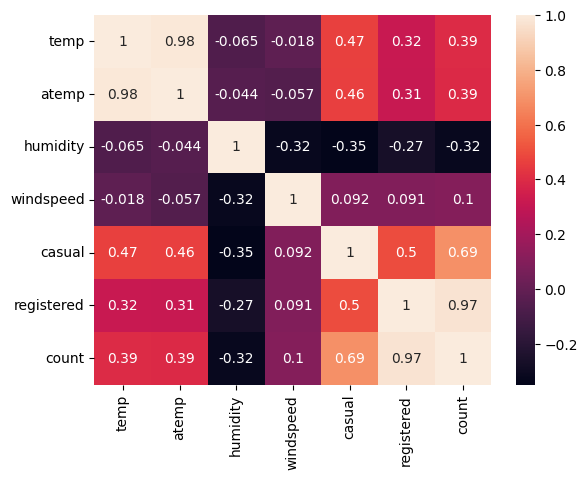

In [22]:
# understanding the correlation between count and numerical variables 
sns.heatmap(df.corr(), annot=True)
plt.show()

Insights

* Very High Correlation (> 0.9) exists between columns [atemp, temp] and [count, registered]


#### 1.5 Illustrate the insights based on EDA

Insights - 

* Now we know that there are 10886 booking details and and 12 attributes for each booking.
* We can see that there is no duplicates rows in the dataset
* We can see that there is no null values in the dataset
* Seasons column is uniformly distributed. Equal number of days in all the four seasons.
* Data has almost twice the workingday than holiday/weekend. 
* Weather is mostly clear, sometimes we get mist or snowfall. But rarely a bad weather. Which is expected as people don't get out on bike on bad weather.
* casual, registered and count somewhat looks like Log Normal Distrinution
* temp, atemp and humidity looks like they follows the Normal Distribution
* windspeed follows the binomial distribution
* Summer and fall has more bookins than winter followed by spring
* Holidays has more bookings compared to working days
* As expected Maximum booking are done on clear weather followed by mist/cloudy and very less bookings on heavy rainy weather.

### 2. Hypothesis Testing

#### 2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented

In [23]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


* Null Hypothesis,Ho: Working day has no effect on the number of cycles being rented.

* Alternate Hypothesis,Ha: Working day has effect on the number of cycles being rented.

* Significance level (alpha): 0.05

* We will use the 2-Sample T-Test to test the hypothess defined above

In [33]:
working_day=df[df['workingday']==1]['count'].values
working_day

array([  5,   2,   1, ..., 168, 129,  88], dtype=int64)

In [34]:
non_working_day=df[df['workingday']==0]['count'].values
non_working_day

array([ 16,  40,  32, ..., 106,  89,  33], dtype=int64)

In [35]:
working_day.mean()

193.01187263896384

In [36]:
non_working_day.mean()

188.50662061024755

In [124]:
t_statistic,p_value=ttest_ind(working_day,non_working_day,alternative="two-sided")
print("t_statistic: ",t_statistic)
print("p_value: ",p_value)
alpha = 0.05
if p_value <alpha :
    print("Interpretation : Reject Ho")
else:
     print("Interpretation : Fail to Reject Ho")



t_statistic:  1.2096277376026694
p_value:  0.22644804226361348
Interpretation : Fail to Reject Ho


Insights

* Since pvalue(0.22) is greater than 0.05 so we fail to  reject the Null hypothesis. Hence, We don't have the sufficient evidence to say that working day has effect on the number of cycles being rented.

#### 2.2 ANNOVA to check if No. of cycles rented is similar or different in different 1. weather 2. season 

#### Lets check the assumptions of annova before performing annova test

In [56]:
#1 data shoud be gaussian- QQ Plot, Wilkin shapiro test
#2 Groups should be independent
#3 Equal variances in diff groups

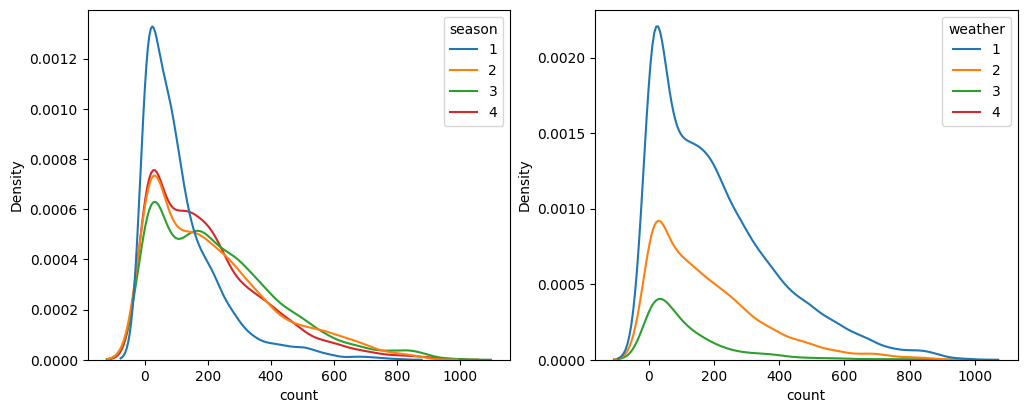

In [80]:
# Checking the distribution 

fig=plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
sns.kdeplot(x='count',hue='season',data=df)

plt.subplot(2,2,2)
sns.kdeplot(x='count',hue='weather',data=df)

plt.show()

Insights:
    
*  Season distribution looks like is not gaussian
*  weather distribution looks like is not gaussian

### QQ plot

In [114]:
spring=df[df['season']==1]['count'].values
summer=df[df['season']==2]['count'].values
fall=df[df['season']==3]['count'].values
winter=df[df['season']==4]['count'].values
clear=df[df['weather']==1]['count'].values
mist=df[df['weather']==2]['count'].values
light_rain=df[df['weather']==3]['count'].values
heavy_rain=df[df['weather']==4]['count'].values

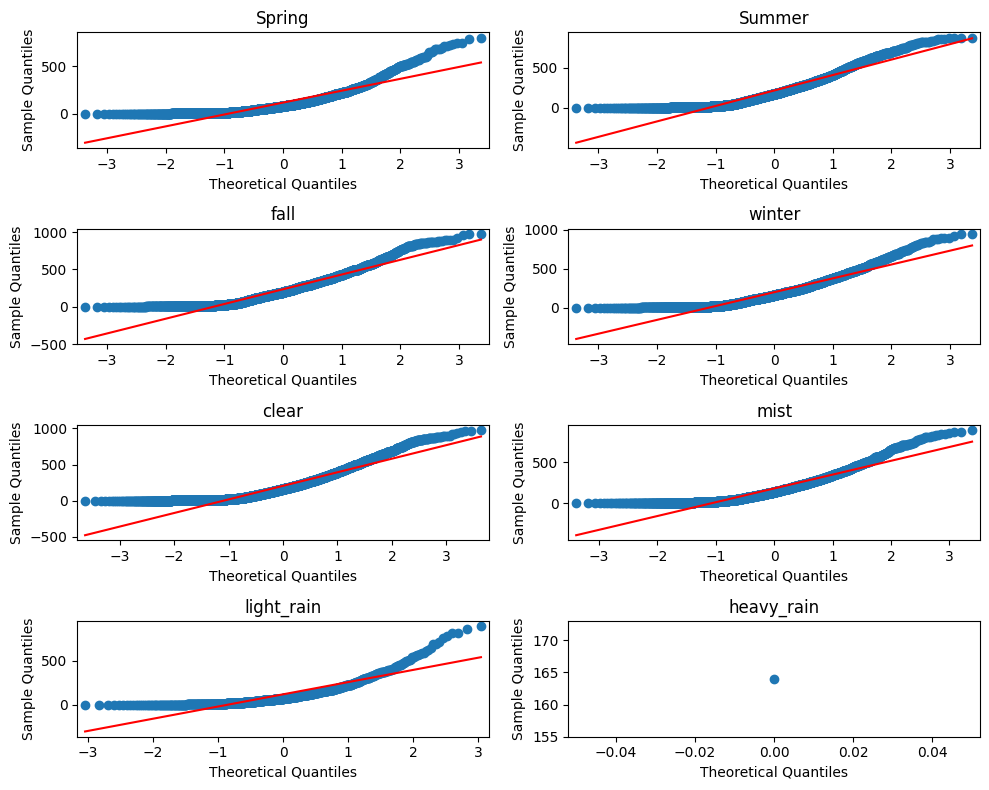

In [115]:
fig, axs = plt.subplots(4, 2, figsize=(10, 8))

sm.qqplot(spring, line='s', ax=axs[0, 0])
axs[0, 0].set_title('Spring')

sm.qqplot(summer, line='s', ax=axs[0, 1])
axs[0, 1].set_title('Summer')

sm.qqplot(fall, line='s', ax=axs[1, 0])
axs[1, 0].set_title('fall')

sm.qqplot(winter, line='s', ax=axs[1, 1])
axs[1, 1].set_title('winter')

sm.qqplot(clear, line='s', ax=axs[2, 0])
axs[2, 0].set_title('clear')

sm.qqplot(mist, line='s', ax=axs[2, 1])
axs[2, 1].set_title('mist')

sm.qqplot(light_rain, line='s', ax=axs[3, 0])
axs[3, 0].set_title('light_rain')

sm.qqplot(heavy_rain, line='s', ax=axs[3, 1])
axs[3, 1].set_title('heavy_rain')



plt.tight_layout()

plt.show()


Insights:
    
* It can be inferred from the above plot that the both season and weather distributions do not follow normal distribution.

### Also now Lets perform wilkin-shapiro test for check normality

In [127]:
spring_sample=df[df['season']==1]['count'].sample(100)
summer_sample=df[df['season']==2]['count'].sample(100)
fall_sample=df[df['season']==3]['count'].sample(100)
winter_sample=df[df['season']==4]['count'].sample(100)
clear_sample=df[df['weather']==1]['count'].sample(100)
mist_sample=df[df['weather']==2]['count'].sample(100)
light_rain_sample=df[df['weather']==3]['count'].sample(100)


In [128]:
# Ho : Data is Gaussian
# Ha : Data is not Gaussian
s_statistic,p_value=shapiro(spring_sample)
print("s_statistic: ",s_statistic)
print("p_value: ",p_value)
alpha = 0.05
if p_value <alpha :
    print("Interpretation : Reject Ho")
else:
     print("Interpretation : Fail to Reject Ho")

s_statistic:  0.8322814702987671
p_value:  2.769406703961863e-09
Interpretation : Reject Ho


In [129]:
# Ho : Data is Gaussian
# Ha : Data is not Gaussian
s_statistic,p_value=shapiro(summer_sample)
print("s_statistic: ",s_statistic)
print("p_value: ",p_value)
alpha = 0.05
if p_value <alpha :
    print("Interpretation : Reject Ho")
else:
     print("Interpretation : Fail to Reject Ho")

s_statistic:  0.930610179901123
p_value:  5.390632213675417e-05
Interpretation : Reject Ho


In [130]:
# Ho : Data is Gaussian
# Ha : Data is not Gaussian
s_statistic,p_value=shapiro(fall_sample)
print("s_statistic: ",s_statistic)
print("p_value: ",p_value)
alpha = 0.05
if p_value <alpha :
    print("Interpretation : Reject Ho")
else:
     print("Interpretation : Fail to Reject Ho")

s_statistic:  0.9122158288955688
p_value:  5.565960236708634e-06
Interpretation : Reject Ho


In [131]:
# Ho : Data is Gaussian
# Ha : Data is not Gaussian
s_statistic,p_value=shapiro(winter_sample)
print("s_statistic: ",s_statistic)
print("p_value: ",p_value)
alpha = 0.05
if p_value <alpha :
    print("Interpretation : Reject Ho")
else:
     print("Interpretation : Fail to Reject Ho")

s_statistic:  0.8854141235351562
p_value:  3.0980578458184027e-07
Interpretation : Reject Ho


In [132]:
# Ho : Data is Gaussian
# Ha : Data is not Gaussian
s_statistic,p_value=shapiro(clear_sample)
print("s_statistic: ",s_statistic)
print("p_value: ",p_value)
alpha = 0.05
if p_value <alpha :
    print("Interpretation : Reject Ho")
else:
     print("Interpretation : Fail to Reject Ho")

s_statistic:  0.8552535176277161
p_value:  1.8632707821097938e-08
Interpretation : Reject Ho


In [133]:
# Ho : Data is Gaussian
# Ha : Data is not Gaussian
s_statistic,p_value=shapiro(mist_sample)
print("s_statistic: ",s_statistic)
print("p_value: ",p_value)
alpha = 0.05
if p_value <alpha :
    print("Interpretation : Reject Ho")
else:
     print("Interpretation : Fail to Reject Ho")

s_statistic:  0.9246383905410767
p_value:  2.5019502572831698e-05
Interpretation : Reject Ho


In [134]:
# Ho : Data is Gaussian
# Ha : Data is not Gaussian
s_statistic,p_value=shapiro(light_rain_sample)
print("s_statistic: ",s_statistic)
print("p_value: ",p_value)
alpha = 0.05
if p_value <alpha :
    print("Interpretation : Reject Ho")
else:
     print("Interpretation : Fail to Reject Ho")

s_statistic:  0.7494646906852722
p_value:  9.062603098519695e-12
Interpretation : Reject Ho


Insights

* After applying shapiro test as well , we came to know that the samples do not follow normal distribution. 

### Levene's Test

#### Check for equal of Variances using Levene's test

In [136]:
spring_sample_levene=df[df['season']==1]['count'].sample(500)
summer_sample_levene=df[df['season']==2]['count'].sample(500)
fall_sample_levene=df[df['season']==3]['count'].sample(500)
winter_sample_levene=df[df['season']==4]['count'].sample(500)
clear_sample_levene=df[df['weather']==1]['count'].sample(500)
mist_sample_levene=df[df['weather']==2]['count'].sample(500)
light_rain_sample_levene=df[df['weather']==3]['count'].sample(500)


In [137]:
# H0: Variances are equal
# Ha: Variances are not equal
levene_stat, p_value = levene(spring_sample_levene,summer_sample_levene,fall_sample_levene,winter_sample_levene)
if p_value < 0.05:
      print("Reject Ho")
print("Variances are not equal")

Reject Ho
Variances are not equal


In [138]:
# H0: Variances are equal
# Ha: Variances are not equal
levene_stat, p_value = levene(clear_sample_levene, mist_sample_levene,light_rain_sample_levene)
if p_value < 0.05:
      print("Reject Ho")
print("Variances are not equal")

Reject Ho
Variances are not equal


#### Since the samples are not normally distributed and do not have the same variance, f_oneway test(Annova) cannot be performed here, we can perform  Kruskal-Wallis H-test here now


* Null Hypothesis: Number of cycles rented is similar in different weather and season.

* Alternate Hypothesis: Number of cycles rented is not similar in different weather and season.

* Significance level (alpha): 0.05

* Here, we will use the Kruskal to test the hypothess defined above

In [139]:
f_statistic,p_value=kruskal(spring,summer,fall,winter,mist,light_rain,heavy_rain)
print("f_statistic: ",f_statistic)
print("p_value: ",p_value)
alpha = 0.05
if p_value <alpha :
 print("Interpretation : Reject Ho")
else:
 print("Interpretation : Fail to Reject Ho")

f_statistic:  856.59766475555
p_value:  9.050493651704978e-182
Interpretation : Reject Ho


Insight

* Since p-value is less than 0.05, we reject the null hypothesis. This implies that Number of cycles rented is not similar in different weather and season conditions

### Also performing ANNOVA test for camparing with kruskal test

* Null Hypothesis: Number of cycles rented is similar in different weather and season.

* Alternate Hypothesis: Number of cycles rented is not similar in different weather and season.

* Significance level (alpha): 0.05

* Here, we will use the ANOVA to test the hypothess defined above

In [168]:
f_statistic,p_value=f_oneway(spring,summer,fall,winter,mist,season_2,light_rain,heavy_rain)
print("f_statistic: ",f_statistic)
print("p_value: ",p_value)
alpha = 0.05
if p_value <alpha :
    print("Interpretation : Reject Ho")
else:
    print("Interpretation : Fail to Reject Ho")

f_statistic:  131.60946554735202
p_value:  1.499461678503533e-189
Interpretation : Reject Ho


* We getting the same result as kruskal test

### Chi-square test to check if Weather is dependent on the season

In [142]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [158]:
# First, finding the contingency table such that each value is the total number of total bikes rented 
  # for a particular season and weather 
cross_table = pd.crosstab(index = df['season'], 
                          columns = df['weather'])
cross_table

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


* Null Hypothesis ( H0 ) - weather is independent of season

* Alternate Hypothesis ( HA ) - weather is dependent of seasons.

* Significance level (alpha): 0.05

* Here, we will use the Chi square to test the hypothess defined above

In [166]:
season_weather = pd.crosstab(index = df['season'], 
                          columns = df['weather'], 
                          values = df['count'], 
                          aggfunc = np.sum).replace(np.nan, 0)
season_weather

weather,1,2,3,4
season,,,,
1,223009.0,76406.0,12919.0,164.0
2,426350.0,134177.0,27755.0,0.0
3,470116.0,139386.0,31160.0,0.0
4,356588.0,157191.0,30255.0,0.0


In [167]:
chi_stat,p_value,dof,expected_freq=chi2_contingency(season_weather)
print("chi_stat : ",chi_stat)
print("p_value : ",p_value)
print("df : ",dof)
print("expected_freq : ",expected_freq)
alpha = 0.05
if p_value <alpha :
    print("Interpretation : Reject Ho")
else:
    print("Interpretation : Fail to Reject Ho")


chi_stat :  11769.559450959445
p_value :  0.0
df :  9
expected_freq :  [[2.21180553e+05 7.59953534e+04 1.52975188e+04 2.45745681e+01]
 [4.16375587e+05 1.43062351e+05 2.87978002e+04 4.62619795e+01]
 [4.53449224e+05 1.55800469e+05 3.13619255e+04 5.03810967e+01]
 [3.85057636e+05 1.32301826e+05 2.66317555e+04 4.27823557e+01]]
Interpretation : Reject Ho


Insights

* There is statistically significant dependency of weather and season based on the number of number of bikes rented.

Insights Summary:

* There are 10886 booking details and and 12 attributes for each booking.

* We can see that there is no duplicates rows in the dataset

* We can see that there is no null values in the dataset

* Seasons column is uniformly distributed. Equal number of days in all the four seasons.

* Data has almost twice the workingday than holiday/weekend. 

* Weather is mostly clear, sometimes we get mist or snowfall. But rarely a bad weather. Which is expected as people don't get out on bike on bad weather.

* Summer and fall has more bookins than winter followed by spring

* Holidays has more bookings compared to working days

* As expected Maximum booking are done on clear weather followed by mist/cloudy and very less bookings on heavy rainy weather.

* temp, atemp and humidity looks like they follows the Normal Distribution

* casual, registered and count looks like Log Normal Distrinution

* windspeed looks like follows the binomial distribution

* Very High Correlation (> 0.9) exists between columns [atemp, temp] and [count, registered]

* Since pvalue(0.22) is greater than 0.05 so we fail to  reject the Null hypothesis. Hence, We don't have the sufficient evidence to say that working day has effect on the number of cycles being rented.

* Since p-value is less than 0.05, we reject the null hypothesis. This implies that Number of cycles rented is not similar in different weather and season conditions

* There is statistically significant dependency of weather and season based on the number of number of bikes rented.

    


Recommendations:

* As we can conculde that summer and fall has most number of bookings , the compnay should arrange for adequate stock of vehicles to cater the demand

* workingday has no effect on the number of bikes being rented.So we can cannot differentiate amongg these two.Equal priorities to be given

* Sufficeint stocks has to be available during as per the weater condition as well. We can see that most booking are done on clear weather. We have proved the with chi test as well with 95% confidence

* Encourage customers to provide feedback and reviews on their biking experience. Collecting feedback can help identify areas for improvement, understand customer preferences, and tailor the services to better meet customer expectations.

* More social media marketing

* Speical offers by customer segentation eg For registered users, for office employees. for students
